Данные взяты с сайта https://rp5.ru/Архив_погоды_в_Шереметьево,_им._А._С._Пушкина_(аэропорт)


**Ссылки на вебинары:**

* 1 день: https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-znakomimsya-s-python141122/

* 2 день: https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-tekhniki-issledovaniya151122/

* 3 день: https://live.skillbox.ru/webinars/code/analiz-dannykh-v-data-science-podvodim-itogi161122/

[Презентация](https://docs.google.com/presentation/d/1H40nQB5_7pjns5eRDWZvjH20tnDzvDm5/edit?usp=sharing&ouid=105457601321822381103&rtpof=true&sd=true)

[Пустая тетрадь для заполнения](https://colab.research.google.com/drive/1MI4Hw3Mjp6DTiR0SlQ-QvdQHsTFgXkBi?usp=sharing)

# На какой уровень рассчитан интенсив?

<img src='https://drive.google.com/uc?export=view&id=1jh8IXsRZMwODB7Yk_ZH7pR1laJaQlaly' height=300>

\- *Смогу ли я справиться с ДЗ, если не знаю не одной функции?*

Секрет: спикер тоже не знал эти функции, когда впервые сел кодить :) Поэтому ДЗ будет дано в формате "замените одну строчку вот здесь и вот здесь аналогично тому, как мы делали на вебинаре". А еще мы не требуем от вас идеального выполнения - мы зачтем работу, даже если код не работает :)

# День 1

##1.1. Введение в Python

In [12]:
# Комментарий начинается со знака "решетка" и заканчивается в конце строки
# Чтобы добавить новую ячейку, нужно нажать кнопку "+Код" в левом верхнем углу, для запуска - Shift+Enter
# Ячейка выведет значение выражения в последней строке (либо значение переменной)

# Переменная - аналог x, y, z в школьных формулах - значение, которому мы дали удобное имя (главное, что оно не начиналось с цифры)
x = 1
y = 2
print(x + y)

3


In [13]:
# Для того, чтобы писать какие-то программы, нужны списки с данными (например, список со значенийми температуры). 
# Список записывается в квадрадных скобках через запятую
arr = [1, 2, 3, 4, 5, x, y, x + y]

print(arr)

[1, 2, 3, 4, 5, 1, 2, 3]


In [14]:
# А что, если значение неизвестно? Например, термометр сломался.
# Специальный тип данных "ничто" (None (pure Python), NaN - not a number (pandas), NaT - not a time (pandas))
arr = [1, None, 3, 4, 5, x, y, x + y] # 0, 1, 2, 3, 4...

In [15]:
# В списке можно получить любое значение по его номеру ("адресу") в списке. 
# Нумерация начинается с 0, номер пишется в квадратных скобках

arr[0], arr[1], arr[2]

(1, None, 3)

##1.2. Matplotlib: графики

In [16]:
# Для того, чтобы использовать какой-то функционал сложнее арифметических операций, 
# нужно в явном виде подключить пакет (библиотеку, модуль)

import matplotlib.pyplot as plt

# Эту ячейку нужно обязательно выполнить, чтобы не получить потом ошибку NameError: name 'plt' is not defined

ModuleNotFoundError: No module named 'matplotlib'

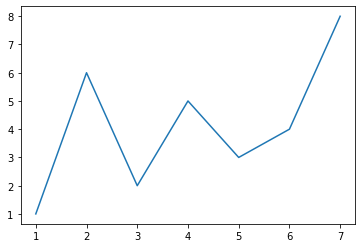

In [ ]:
# Список координат по оси X и Y, передаем их в функцию как аргументы

x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 6, 2, 5, 3, 4, 8]

plt.plot(x, y)

### Бонус

Картинка в начале файла тоже сгенерирована с помощью matplotlib 😉

Вот код:

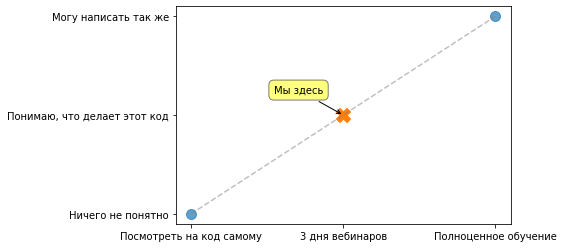

In [ ]:
plt.plot([0, 1, 2], [0, 1, 2], alpha=0.5, c='gray', linestyle='--')
plt.xticks([0, 1, 2], ['Посмотреть на код самому', '3 дня вебинаров', "Полноценное обучение"])
plt.yticks([0, 1, 2], ['Ничего не понятно', 'Понимаю, что делает этот код', "Могу написать так же"])
plt.scatter([0, 2], [0, 2], alpha=0.7, marker='o', s=100)
plt.scatter([1], [1], alpha=1, marker="X", s=200)
plt.annotate(
        "Мы здесь",
        xy=(1, 1), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.savefig('complexity.png', dpi=300, transparent=False, bbox_inches='tight')

## 1.3 Скачиваем файл из интернета

https://rp5.ru/Архив_погоды_в_Шереметьево,_им._А._С._Пушкина_(аэропорт)

Вкладка "Скачать архив погоды":
* Формат: CSV (текстовый)
* Кодировка: UTF-8

Получаем текстовый файл, в котором ячейки таблицы разделены точкой с запятой `;`

In [ ]:
import os
import urllib.request

url = "http://37.9.3.250/download/files.synop/27/27514.01.01.2016.01.01.2022.1.0.0.ru.utf8.00000000.csv.gz"
filename = "weather.csv.gz"
urllib.request.urlretrieve(url, filename)

('weather.csv.gz', <http.client.HTTPMessage at 0x7fa0c4943290>)

##1.4. Pandas: таблицы

Для работы с таблицами вместо Excel используются объекты pandas DataFrame ([документация на англ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html))

In [ ]:
# Подключаем библиотеку pandas для работы с таблицами (стандартный псевдоним - pd)

import pandas as pd

: 

In [ ]:
# Считываем таблицу в переменную data, удалив первые 6 строк с комментариями
data = pd.read_csv(filename, skiprows=6, encoding='utf-8', compression='gzip', sep=';', index_col=False)

In [ ]:
# Смотрим, что получилось
# первые 10 строк
data.head(10)

,Местное время в Шереметьево / им. А. С. Пушкина (аэропорт),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,01.01.2022 21:00,-3.1,734.7,752.3,NaN,89,"Ветер, дующий с северо-запада",4,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,NaN,-4.7,0.4,12.0,NaN,NaN,NaN,NaN
1,01.01.2022 18:00,-2.6,734.1,751.6,NaN,84,"Ветер, дующий с севера",3,NaN,NaN,...,NaN,NaN,10.0,-4.9,NaN,NaN,NaN,NaN,NaN,NaN
2,01.01.2022 15:00,-1.4,733.2,750.6,NaN,83,"Ветер, дующий с северо-запада",4,NaN,NaN,...,NaN,NaN,10.0,-3.9,NaN,NaN,NaN,NaN,NaN,NaN
3,01.01.2022 12:00,-1.5,733.2,750.6,NaN,92,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,NaN,NaN,10.0,-2.6,NaN,NaN,NaN,NaN,NaN,NaN
4,01.01.2022 09:00,-1.8,732.8,750.3,NaN,94,"Ветер, дующий с запада",4,NaN,NaN,...,NaN,NaN,7.0,-2.6,2.0,12.0,NaN,NaN,NaN,NaN
5,01.01.2022 06:00,-2.5,732.5,750.0,NaN,96,"Ветер, дующий с западо-юго-запада",3,NaN,NaN,...,NaN,NaN,2.5,-3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,01.01.2022 03:00,-3.0,733.2,750.7,NaN,94,"Ветер, дующий с юго-запада",4,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,2.6,-3.8,NaN,NaN,NaN,NaN,NaN,NaN
7,01.01.2022 00:00,-3.6,734.0,751.6,NaN,94,"Ветер, дующий с юго-юго-запада",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",0.7,-4.4,NaN,NaN,NaN,NaN,NaN,NaN
8,31.12.2021 21:00,-4.3,735.0,752.7,NaN,92,"Ветер, дующий с юга",4,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",3.8,-5.4,0.4,12.0,NaN,NaN,NaN,NaN
9,31.12.2021 18:00,-4.6,737.1,754.8,NaN,90,"Ветер, дующий с юго-юго-запада",5,NaN,NaN,...,NaN,NaN,4.5,-6.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Посмотрим на список колонок, который есть в таблице
data.columns

Index(['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)', 'T', 'Po',
       'P', 'Pa', 'U', 'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn',
       'Tx', 'Cl', 'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg',
       'E'', 'sss'],
      dtype='object')

In [ ]:
# Посмотрим на колонку 'T' (температура). У каждого значения есть номер его строки в таблице
data['T']

0        -3.1
1        -2.6
2        -1.4
3        -1.5
4        -1.8
         ... 
15727    28.5
15728    26.6
15729    23.7
15730    18.2
15731    17.7
Name: T, Length: 15732, dtype: float64

In [ ]:
data['T'][15000]

-3.3

In [ ]:
# Хотим нарисовать график температуры от времени
# Для этого нужно преобразовать колонку с датами в российском формате в питоновский формат дат 
# (вы можете попробовать дома без преобразования и посмотреть, как все зависло)
# Не забыть dayfirst=True
data['date'] = pd.to_datetime(data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)'],
                              dayfirst=True)

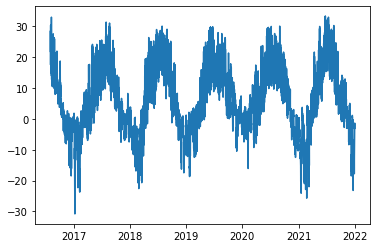

In [ ]:
# Распечатаем график температуры
x = data['date']
y = data['T']

plt.plot(x, y)

In [ ]:
# Нам доступно 100% данных или есть пропуски? Удаляем некорректные данные
condition_skipped = data['T'].isna()
data[condition_skipped]

,Местное время в Шереметьево / им. А. С. Пушкина (аэропорт),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
1362,15.07.2021 15:00,NaN,743.2,759.5,NaN,89,"Ветер, дующий с западо-юго-запада",9,NaN,29.0,...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,18.5,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-15 15:00:00
1505,27.06.2021 18:00,NaN,741.9,758.2,NaN,89,"Ветер, дующий с севера",6,NaN,17.0,...,Перистые (часто в виде полос) и перисто-слоист...,10.0,18.6,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-27 18:00:00
2609,08.02.2021 21:00,NaN,749.4,768.2,NaN,82,Переменное направление,2,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,-17.5,0.4,12.0,NaN,NaN,NaN,NaN,2021-02-08 21:00:00
9218,05.11.2018 15:00,NaN,756.6,774.0,NaN,62,"Штиль, безветрие",0,NaN,NaN,...,"Перистые нитевидные, иногда когтевидные, не ра...",10.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-05 15:00:00


In [ ]:
condition_good = data['T'].notna()
data = data[condition_good]

In [ ]:
# Максимум, минимум, среднее

data['T'].min(), data['T'].max(), data['T'].mean()

(-30.8, 33.2, 6.482547049847405)

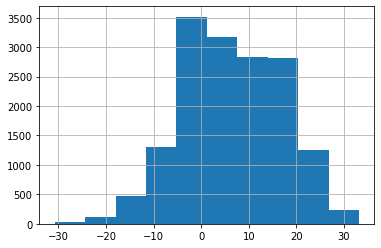

In [ ]:
# Каким температурам будет подвергаться здание чаще всего?

# Гистограмма - график, который показывает, сколько раз встречалось то или иное значение
data['T'].hist()

In [ ]:
# "95-й квантиль равен 23.0 градусам" - если температура не превыает 23.0 градусов в 95% случаев

data['T'].quantile(0.95), data['T'].quantile(0.05),

(23.0, -10.364999999999998)

In [ ]:
# В 90% случаев температура находится в диапазоне от <-9.8> до <23.8> градусов

In [ ]:
# Что нам потребуется для обучения модели - выделение определенных диапазонов данных

# Выбираем данные по условию


## Конец 1 дня: упражнение для самопроверки

Сдавать никуда не нужно, обсуждание в ТГ-чате приветствуется 😃

Обрезать данные так, чтобы оставить график аномалии в 2017 году (например, с ноября 2016 по март 2017)
1. Это упражнение можно сделать, скомбинировав код с вебинара (займет 4 строчки на создание data_short)
2. Есть много способов задать data_short в 1 строчку, гуглить можно и нужно (задание со *)

# День 2

## Анализ данных

В качестве тренировки будем прогнозировать температуру на улице в зависимости от дня в году на основе исторических даных. Построим разные модели, научимся их сравнивать и выберем лучшую.

### Ссылки на ресурсы
[Визуализация работы Дерева Решений (Decision Tree)](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)


[Документация pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

[Документация sklearn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[Документация sklearn DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


## Скачиваем данные и подключаем библиотеки

In [ ]:
import os
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd

url = "http://37.9.3.250/download/files.synop/27/27514.01.01.2016.01.01.2022.1.0.0.ru.utf8.00000000.csv.gz"
filename = "weather.csv.gz"
urllib.request.urlretrieve(url, filename)

# Считываем Excel-таблицу в переменную data, удаляем первые 6 строк комментарией
data = pd.read_csv(filename, compression='gzip', encoding='utf-8', sep=';', 
                   skiprows=6, index_col=False)
# Удаляем пропуски
data = data[data['T'].notna()]
# Преобразуем в российский формат дат для дальнейшего анализа
data['date'] = pd.to_datetime(data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)'], dayfirst=True)

## Разбор упражнения  1-го дня

In [ ]:
# Приблизить график аномалии в 2017 году (например, обрезать с ноября 2016 по март 2017)
# 1) Это упражнение можно сделать скомбинировав код с вебинара (займет 4 строчки на создание data_short)
# 2) Есть много способов задать data_short в 1 строчку, гуглить можно и нужно (задание со *)

In [ ]:
# 1) вариант как можно было делать упражнение:
# data['date'] > '2017-01-02'
# data['date'] < '2017-03-01'

In [ ]:
# 2) вариант в одну строку

# condition = (data['date'] < '2017-03-01') & (data['date'] > '2017-01-02')

In [ ]:
# 3) вариант в одну строку с помощью функции between

## Что значит "Построить модель"?

Что имеем: график реальных данных. Мы не знаем, по какому закону он построен, и пытаемся его узнать - то есть подобрать функцию $y = f(x)$.

Работа Data Scientist - подобрать наиболее близкую функцию с помощью инструментов машинного обучения.


* y  -  **target** (таргет, целевая переменная) - величина, которую хотим прогнозировать. В данном случае это температура из колонки `data['T']`.
* X -  **features** (признаки) -  факторы, по которым хотим прогнозировать что-то. В нашем случае это день в году. Можно выбрать / сконструировать другие признаки. Это входит в работу Data Scientist.

## Сегодня построим 2 модели
1. **Линейная регрессия** (LinearRegression) Посмотрим на данные глазами, подумаем, на какую функцию похож график, автоматически инструментами ML подберем коэффициенты функции так, чтобы графики совпали.  
2. **Дерево решений** (DecisionTree) Построим альтернативную модель, которая строит ступенчатую функцию, и сравним численно, какая модель лучше годится для прогноза.

Чтобы обучить модель (любую), нужно пройти 2 предварительные стадии:

1.   Сгенерировать новые признаки (если нужно)
2.   Разделить данные на 2 _выборки_ (2 набора записей) - для обучения модели и для тестирования


In [ ]:
# Сгенерируем новый признак: день в году



## Модель 1: Линейная регрессия
Истинная модель - какая-то функция $y = f(x)$.

Пытаемся подобрать функцию z(x), которая просто вычисляется и максимально похожа на f(x).

Самая простая модель - линейная регрессия, которая подбирает коэффициенты
$z = ax+b$



* Коэффициенты a и b - **параметры** модели. Они подбираются автоматически в процессе обучения

### Данные похожи на какую-нибудь функцию, знакомую нам со школы?

График реальных данных VS Примеры простейших функций


Какую функцию будем пытаться подогнать?

<img src='https://drive.google.com/uc?export=view&id=1vPuuN-GioeEta9e6WuNtz3Uohdf8lLny' height=180>

Данные очень похожи на косинус. Но его нужно подогнать к нашим данным:
1. **по периоду** (растянуть в ширину) - сделаем вручную (т.к. знаем и длительность года, и период косинуса)
2. **по амплитуде** (растянуть в высоту) - подберем коэффициенты с помощью линейной регрессии.

## 1 подготовительный шаг: сгенерируем новый признак

In [ ]:
# Подключаем библиотеку с математическими функциями
import numpy as np

In [ ]:
# Новый признак: косинус от дня в году.
# Период [1, 366] перегоним в период [0, 2*pi] (подгоняем косинусоиду по ширине)
# день в году в радианах = (dayofyear - 1) / 366 * 2*pi
# косинус от дня в году = cos(день в году в радианах из диапазона 0 до 2*pi)


## 2 подготовительный шаг - Разделение данных на train-test

Вначале нужно разбить данные на 2 выборки: на тренировочную (обучающую, train) и тестовую (валидационную, test, val)

На обучающей выборке модель подгоняет свои внутренние параметры с помощью статистики (шаг "обучение", fit)

На тестовой выборке мы тестируем качество модели, на ней она как студент проходит экзамен

Если студент вызубрил ответы, но ничего не понял - точность ответов на тренировочной выборке будет высокой, а на тестовой - очень низкой

In [ ]:
# data_train - обучающая выборка
# data_test - тестовая выборка

In [ ]:
# Для того, чтобы обучить модель, нужно еще раз разделить выборку 
# на фичи (признаки, features, X) и таргет (целевую переменную, которую прогнозируем, target, y)
# 2 датасета train-test х 2 features-target - создаем 4 переменных: 
# X_train, y_train, X_test, y_test
# 
# 
# Мы будем делать прогноз только на одном факторе - номере дня в году data['dayofyear']
# Но модель ожидает, список колонок - поэтому название берется в квадратные кавычки 2 раза: 
# для обозначения, что мы копируем колонки и для обозначения списка



# "y" - один столбец, поэтому квадратные кавычки 1 раз


## 1 модель: Линейная регрессия (Linear Regression)

Будем с ее помощью подгонять коэффициент при косинусе так, чтобы растянуть его в высоту до уровня наших данных

$z = a \cos(dayofyear) + b$

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Создаем пустой объект со случайными a и b, которые пока не описывают наши данные


In [ ]:
# Обучаем модель: подгоняем модель по данным X_train и говорим "правильные ответы" - y_train


In [ ]:
# Посмотрим, какую мат. модель построила регрессия по данным, поэтому распечатаем 

# прогноз на данных, которые модель еще не видела


# Распечатаем графики


In [ ]:
# Проверяем качество численно

# mean_absolute_error - средняя сумма отклонений (меньше -> лучше)

from sklearn.metrics import mean_absolute_error

# print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

In [ ]:
# Собираем все шаги воедино

# Новый признак: косинус от дня в году
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)

# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

# Из train-test формируем X_train, X_test.
# X = список параметров для прогноза => 2 раза кавычки (м.б. несколько параметров)
X_train = data_train[['cos_dayofyear']]  
X_test = data_test[['cos_dayofyear']]
# "y" - то, что будем прогнозировать. 1 колонка => 1 квадратные кавычки
y_train = data_train['T']
y_test = data_test['T']

# Создаем модель и обучаем ее
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем прогноз
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Печатаем графики
plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], y_train, label='Data train')
plt.scatter(data_test['date'], y_test, label='Data test')
plt.scatter(data_train['date'], pred_train, label='Predict train')
plt.scatter(data_test['date'], pred_test, label='Predict test')
plt.legend()

# Смотрим на величину ошибки
print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

# 1) LinearRegression + cos_dayofyear
# Средняя ошибка на обучающей выборке = 
# Средняя ошибка на тестовой выборке = 

## 2 Модель: Дерево решений (Decision Tree)
Визуализация: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/ 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Здесь косинусное преобразование уже не нужно - будем делать прогноз на исходном факторе "день в году"

In [ ]:
# 2) Decision Tree + dayofyear



## Как мы можем улучшить модель?

* Модель слишком сильно "зазубрила" ответы (как студент, который ничего не понял, а только списывает со шпаргалки) - это называется **_переобучение_**. Это видно из того, что на тренировочной выборке ошибка заметно меньше, чем на тестовой

* Исправляем ее - задаем модели ограничения, чтобы она стала проще и не смогла зубрить

* В случае дерева мы можем играть с глубиной max_depth / количеством листьев

Документация библиотеки, где можно посмотреть параметры модели, которые можно настраивать: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

## Модель 2.1 Decision Tree + dayofyear + настройка параметров

In [ ]:
# 2.1) Decision Tree + dayofyear + настройка параметров

# model = DecisionTreeRegressor(max_depth=5)  # Заменяем модель



## **ДЗ 2-го дня**

 Провести больше экспериментов по улучшению качества модели. 

1) Протестировать качество модели DecisionTreeRegressor + cos(день в году)
 
2) Поиграть с признаками - добавить больше признаков в модель (sin, sin и cos, dayofyear и cos и т.п.)
 
_Сданной считается работа, в которой проделаны эксперименты хотя бы по одному из пунктов, даже если код не удалось заставить работать  :)_
 
ДЗ сдается через **Google Form, закрепленную в Телеграм-канале, в виде ссылки на файл**, аналогичный тому, в котором работали сегодня (не забудьте дать доступ на просмотр по ссылке - справа сверху кнопка "Поделиться")